# GTFSUtils Quickstart

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import json
import requests
import datetime
import numpy as np
import pandas as pd
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

from gtfsutils import (
    load_gtfs,
    save_gtfs,
    filter_gtfs,
    load_shapes
)

# Download Vienna GTFS

In [ ]:
%%bash
mkdir -p data
wget http://www.wienerlinien.at/ogd_realtime/doku/ogd/gtfs/gtfs.zip \
  -qO data/vienna.gtfs.zip

# Vienna Boundaries

- [Relation: Innere Stadt (1990592)](https://www.openstreetmap.org/relation/1990592)
- [Relation: Donaustadt (1991434)](https://www.openstreetmap.org/relation/1991434)

In [3]:
%%time
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = "[out:json];rel(1991434);out bb;"
response = requests.get(
    overpass_url, params={'data': overpass_query})
data = response.json()

bounds = data['elements'][0]['bounds']
bounds = [bounds[key] for key in ['minlon', 'minlat', 'maxlon', 'maxlat']]
bounds

CPU times: user 4.38 ms, sys: 3.42 ms, total: 7.8 ms
Wall time: 1.04 s


[16.398134, 48.1352198, 16.5775132, 48.2935324]

In [4]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = load_gtfs(filepath)

CPU times: user 5.09 s, sys: 638 ms, total: 5.73 s
Wall time: 5.76 s


In [5]:
# Show available dataframes
df_dict.keys()

dict_keys(['stops', 'stop_times', 'shapes', 'calendar_dates', 'calendar', 'trips', 'routes', 'agency'])

# Visualize Data

In [6]:
%%time
gdf = load_shapes(df_dict)

CPU times: user 4.45 s, sys: 9.36 ms, total: 4.46 s
Wall time: 4.47 s


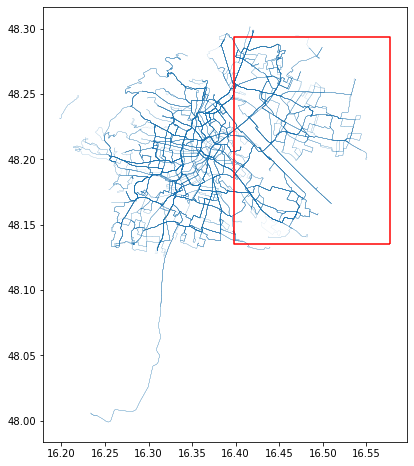

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.plot(ax=ax, linewidth=0.1, alpha=0.5);
gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary.plot(ax=ax, color='r');

# Filter by Geometry (Within)

In [8]:
%%time
filter_gtfs(df_dict, bounds, operation='within')

CPU times: user 4.86 s, sys: 38.9 ms, total: 4.9 s
Wall time: 4.93 s


In [9]:
%%time
gdf = load_shapes(df_dict)

CPU times: user 1.03 s, sys: 3.82 ms, total: 1.03 s
Wall time: 1.03 s


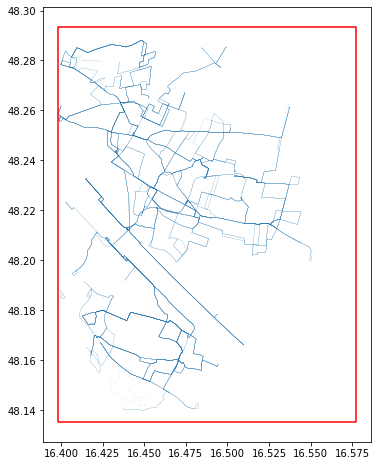

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.plot(ax=ax, linewidth=0.1, alpha=0.5);
gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary.plot(ax=ax, color='r');

# Filter by Geometry (Intersects)

In [11]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = load_gtfs(filepath)

CPU times: user 5.53 s, sys: 593 ms, total: 6.12 s
Wall time: 6.14 s


In [12]:
%%time
filter_gtfs(df_dict, bounds, operation='intersects')

CPU times: user 4.95 s, sys: 70 ms, total: 5.02 s
Wall time: 5.05 s


In [13]:
%%time
gdf = load_shapes(df_dict)

CPU times: user 2.25 s, sys: 0 ns, total: 2.25 s
Wall time: 2.25 s


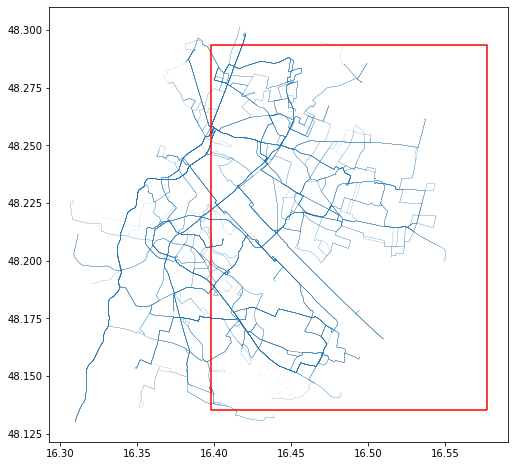

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.plot(ax=ax, linewidth=0.1, alpha=0.5);
gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary.plot(ax=ax, color='r');

# Save Filtered GTFS File

In [15]:
%%time
filepath = "data/vienna-filtered.gtfs.zip"
save_gtfs(df_dict, filepath, ignore_required=True, overwrite=True)

CPU times: user 9.34 s, sys: 304 ms, total: 9.65 s
Wall time: 27.5 s
